# Final Project Part 2
**Names/PIDs :**  
* Sowmya Ranga, mya1895
* Jagrit Behl, jaib97
* Ronnie Fesco, ronnief1

# Hypothesis

As we started digging through the data set we discovered different patterns in various data contexts. We came up with some possible ways to correlate data (some which we have yet to do) to deeper investigae these patterns. 

Potential places for cyber security threats could include phishing through emails or attachments with malware. We tried to identify these kinds of threats by looking into the html data to see what kinds of links were visited as well as looking at emails and sorting by a few different mechanisms. 

From looking through the http_info.csv file we broke down the links to examine the domains of the websites and figure out which ones were most frequently visited but also, more importantly, which were least visited to identify any suspicious activity.

For emails, we identified people who sent emails to a lot of people and to non-company emails, specifically personal emails like hotmail or gmail. Some people seem to be frequently sending emails to outside-company contacts which raises suspicion as to who they are and why they are receiving these emails. 

We also wanted to check if there was activity occuring at odd times of the day, particularly outside the regular work hours of 6am - 8pm. We executed this logic on the devices data and plan to do the same with the logon data next. This lead us to our first suspect that we plan to further explore later. 

We always kept in mind the role of the employee in determing if their activity was suspicious. 

In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt # need this import to get colors and other matplot features
%matplotlib inline
emails = pandas.read_csv('email_info.csv')
httpdata = pandas.read_csv('http_info.csv')
devices = pandas.read_csv('device_info.csv')
employees = pandas.read_csv('employee_info.csv')
#employees

,month,employee_name,user_id,email,role,supervisor
0,5/1/17,Macey Colleen Nash,MCN0973,Macey.Colleen.Nash@dtaa.com,ElectricalEngineer,Ann Hannah Dickerson
1,5/1/17,Nelle Sharon Cherry,NSC0622,Nelle.Sharon.Cherry@dtaa.com,Technician,Amethyst Suki Norris
2,5/1/17,Kathleen Audrey Vargas,KAV0428,Kathleen.Audrey.Vargas@dtaa.com,ProductionLineWorker,Brenna Martha Russell
3,5/1/17,Adrienne Joelle Mclean,AJM0772,Adrienne.Joelle.Mclean@dtaa.com,Scientist,Emmanuel Casey Wiggins
4,5/1/17,Nicole Maris Valentine,NMV0507,Nicole.Maris.Valentine@dtaa.com,Manager,Perry Reese Morton
5,5/1/17,Cora Maggy Wise,CMW0297,Cora.Maggy.Wise@dtaa.com,Salesman,Hanna Miranda Lindsay
6,5/1/17,Christian James Rutledge,CJR0414,Christian.James.Rutledge@dtaa.com,ProductionLineWorker,Brenna Martha Russell
7,5/1/17,Keefe Darius Duran,KDD0511,Keefe.Darius.Duran@dtaa.com,Scientist,Yeo Xyla Garner
8,5/1/17,Akeem Brent Holland,ABH0821,Akeem.Brent.Holland@dtaa.com,Salesman,Dennis Carson Mendoza
9,5/1/17,Benjamin Alec Gutierrez,BAG0190,Benjamin.Alec.Gutierrez@dtaa.com,PurchasingClerk,Jayme Adrienne Jarvis


## http_info.csv data 

Split up the URLs to see what domains they were from ('site' column) also added a column 'path' that is just a list of the string separated by the '/' char if we wanted to investigate into a certain link further to see where it takes you, etc.

In [4]:
httpdata['site'] = httpdata.url.apply(lambda t: (t.split('/'))[2])
httpdata['path'] = httpdata.url.apply(lambda t: (t.split('/')))
httpdata['day'] = httpdata.date.apply(lambda t: t.split()[0])
httpdata
#httpdata[httpdata['day'] == '6/2/2017']

,id,date,user,pc,url,site,path,day
0,{Y1V0-L9KP13HO-2886FNBQ},5/1/2017 0:00,MDS0121,PC-8374,http://yahoo.com/Armillaria_luteobubalina/mont...,yahoo.com,"[http:, , yahoo.com, Armillaria_luteobubalina,...",5/1/2017
1,{J8C2-W3PL21WD-1786TWQY},5/1/2017 0:35,JAO0817,PC-0583,http://instagr.am/1955_MacArthur_Airport_Unite...,instagr.am,"[http:, , instagr.am, 1955_MacArthur_Airport_U...",5/1/2017
2,{Y8Q3-W0WO94DN-1072IWFA},5/1/2017 1:02,JAO0817,PC-0583,http://reference.com/Achtung_Baby/u2s.html,reference.com,"[http:, , reference.com, Achtung_Baby, u2s.html]",5/1/2017
3,{W5H5-N4HW07MA-1950QCOZ},5/1/2017 3:03,CJP0221,PC-5941,http://target.com/Dungeons__Dragons/gygax.html,target.com,"[http:, , target.com, Dungeons__Dragons, gygax...",5/1/2017
4,{V3H3-O1WG29GS-8147SAJB},5/1/2017 3:06,SLC0113,PC-1851,http://foodnetwork.com/1955_MacArthur_Airport_...,foodnetwork.com,"[http:, , foodnetwork.com, 1955_MacArthur_Airp...",5/1/2017
5,{P4P8-K7ZC85EU-3559TSQU},5/1/2017 3:12,SLC0113,PC-1851,http://toysrus.com/1994_Atlantic_hurricane_sea...,toysrus.com,"[http:, , toysrus.com, 1994_Atlantic_hurricane...",5/1/2017
6,{Z0P7-A9QX52PK-3761TDMK},5/1/2017 3:13,WMH0866,PC-9974,http://youtube.com/2004_World_Series/varitek.html,youtube.com,"[http:, , youtube.com, 2004_World_Series, vari...",5/1/2017
7,{F3W5-M6LJ91GN-9315XVER},5/1/2017 4:59,LHC0329,PC-6480,http://hootsuite.com/Mercury_planet/antoniadis...,hootsuite.com,"[http:, , hootsuite.com, Mercury_planet, anton...",5/1/2017
8,{O9D3-H8SR07MC-1436KREP},5/1/2017 5:40,ASN0508,PC-8529,http://expedia.com/1964_Brinks_Hotel_bombing/b...,expedia.com,"[http:, , expedia.com, 1964_Brinks_Hotel_bombi...",5/1/2017
9,{N4H9-Z8HV04NE-5299CBMO},5/1/2017 5:53,ASN0508,PC-8529,http://cnet.com/2000_Sri_Lanka_cyclone/thoothu...,cnet.com,"[http:, , cnet.com, 2000_Sri_Lanka_cyclone, th...",5/1/2017


Grouped by 'site' to see which sites were most frequently visited and possibly flag sites that were less frequently visited that also looked suspicious
The dates of this suspicious activity were 6/03 and 6/24
both these dates are saturdays (so basically friday night)

In [8]:
g = httpdata.groupby('site')
sitehits = pandas.Series(g.size().sort_values(ascending = False))
sitehits

site
youtube.com              104801
facebook.com              53323
yahoo.com                 47358
target.com                39637
google.com                36290
twitter.com               31525
live.com                  22396
wikipedia.org             21835
coupons.com               20579
blogspot.com              17936
usbank.com                16696
aol.com                   15481
foodnetwork.com           15095
tmz.com                   13430
apple.com                 13018
googleusercontent.com     12332
go.com                    12034
cnet.com                  11035
nfl.com                   10865
craigslist.org             9671
aweber.com                 9185
wordpress.com              8979
gap.com                    8937
cracked.com                8750
huffingtonpost.com         8097
espn.go.com                7945
pandora.com                6978
bloomberg.com              6923
retailmenot.com            6626
cnn.com                    6570
                          ...  
ama

## email_info.csv data

In [42]:
emails['people'] = emails.to.apply(lambda t: t.split(';'))
emails['num_people'] = emails.people.apply(len)
emails['non_dtaa'] = emails.people.apply(lambda t: [i for i in t if i.split('@')[-1] != 'dtaa.com'])
emails['num_non_dtaa'] = emails.non_dtaa.apply(len)
emails = emails.sort_values('num_people', ascending = False)


Checking the user_id ECF0196 since he's a suspect based off of the suspicious times he's been online (around 2am to 3am) He's also an attorney so he may have reasons/alterior motives. 

In [43]:
joined = emails.merge(employees, left_on = 'from', right_on='email')
joined.drop_duplicates(subset = 'id', inplace = True)
joined['day'] = joined.date.apply(lambda t: t.split()[0])
#joined[joined['user_id'] == 'ECF0196'].sort_values('day')
joined.sort_values('size', ascending = False)

,id,date,to,from,size,attachments,people,num_people,non_dtaa,num_non_dtaa,employee_name,user_id,email,month,role,supervisor,day
1237442,{O1C0-E2MS09EC-2458ITMU},09/17/2017 18:46:59,Nadine.Anjolie.Gregory@dtaa.com;Kaitlin.Jenna....,Jaquelyn.September.David@dtaa.com,85904,0,"[Nadine.Anjolie.Gregory@dtaa.com, Kaitlin.Jenn...",2,[Kaitlin.Jenna.Morrison@raytheon.com],1,Jaquelyn September David,JSD0488,Jaquelyn.September.David@dtaa.com,5/1/17,Technician,William Vernon Booth,09/17/2017
1347860,{B5A3-Y6QV67NY-3923FXDV},09/17/2017 11:01:21,Simone.Holly.Pratt@dtaa.com;Burke.Rigel.Strong...,Madeline.Mia.Schultz@dtaa.com,85904,0,"[Simone.Holly.Pratt@dtaa.com, Burke.Rigel.Stro...",2,[],0,Madeline Mia Schultz,MMS0872,Madeline.Mia.Schultz@dtaa.com,5/1/17,Technician,Hunter Stephen Slater,09/17/2017
1348889,{Y5M4-A0CH13ZS-4883EUCD},09/17/2017 09:26:09,Nicolas.Gavin.Farrell@dtaa.com;Cameron.Ryder.W...,Maxwell.Driscoll.Gross@dtaa.com,85904,0,"[Nicolas.Gavin.Farrell@dtaa.com, Cameron.Ryder...",3,"[Cameron.Ryder.Warren@optonline.net, Natalie.C...",2,Maxwell Driscoll Gross,MDG0601,Maxwell.Driscoll.Gross@dtaa.com,5/1/17,Technician,Amethyst Suki Norris,09/17/2017
593195,{D9H3-L0VT59QX-7271SIRO},09/17/2017 09:53:13,Bert.Beau.Sloan@dtaa.com;Naomi.Hedy.Gaines@gma...,Velma.Marah.Torres@dtaa.com,85904,0,"[Bert.Beau.Sloan@dtaa.com, Naomi.Hedy.Gaines@g...",2,[Naomi.Hedy.Gaines@gmail.com],1,Velma Marah Torres,VMT0475,Velma.Marah.Torres@dtaa.com,5/1/17,Technician,William Vernon Booth,09/17/2017
2024574,{Q1V7-B1ZL39WL-2063KPXK},09/17/2017 16:09:22,Ezra.Reuben.Warner@dtaa.com,Angelica.Shelly.Ortega@dtaa.com,85904,0,[Ezra.Reuben.Warner@dtaa.com],1,[],0,Angelica Shelly Ortega,ASO0737,Angelica.Shelly.Ortega@dtaa.com,5/1/17,Technician,Porter Hop Livingston,09/17/2017
813439,{P2N2-O4QD01SK-7509JSZZ},09/17/2017 15:18:27,Chase.Lane.Booth@dtaa.com;Jameson.Orlando.Sosa...,Quemby.Summer.Barry@dtaa.com,85904,0,"[Chase.Lane.Booth@dtaa.com, Jameson.Orlando.So...",2,[],0,Quemby Summer Barry,QSB0729,Quemby.Summer.Barry@dtaa.com,5/1/17,Technician,Porter Hop Livingston,09/17/2017
2580769,{B8K5-U8JL26NS-8495AFIV},09/17/2017 07:30:43,Emerald.Nomlanga.Wilkerson@dtaa.com,Benedict.Ivan.Rowe@dtaa.com,85904,0,[Emerald.Nomlanga.Wilkerson@dtaa.com],1,[],0,Benedict Ivan Rowe,BIR0613,Benedict.Ivan.Rowe@dtaa.com,5/1/17,Technician,Amethyst Suki Norris,09/17/2017
1607742,{L2D2-Q8FT98DD-1566XPPZ},09/17/2017 12:46:36,Elmo.Brendan.Haynes@dtaa.com;Uta.April.Morse@a...,Hiram.Charles.Hurley@dtaa.com,85904,2,"[Elmo.Brendan.Haynes@dtaa.com, Uta.April.Morse...",2,[Uta.April.Morse@aol.com],1,Hiram Charles Hurley,HCH0753,Hiram.Charles.Hurley@dtaa.com,5/1/17,Technician,Porter Hop Livingston,09/17/2017
1292049,{I8C6-T8CQ89DF-6954OGQF},09/17/2017 10:10:48,Ebony.Sandra.Bush@dtaa.com,Camilla.Ramona.Mcleod@dtaa.com,85904,0,[Ebony.Sandra.Bush@dtaa.com],1,[],0,Camilla Ramona Mcleod,CRM0852,Camilla.Ramona.Mcleod@dtaa.com,5/1/17,Technician,Hunter Stephen Slater,09/17/2017
1354118,{K4H8-J7WB02RF-5211AGKG},09/17/2017 18:40:45,Nasim.Amir.Jackson@dtaa.com;Davis.Gareth.Cote@...,Baxter.Knox.Mejia@dtaa.com,85904,1,"[Nasim.Amir.Jackson@dtaa.com, Davis.Gareth.Cot...",2,[],0,Baxter Knox Mejia,BKM0492,Baxter.Knox.Mejia@dtaa.com,5/1/17,Technician,William Vernon Booth,09/17/2017


In [93]:
non_dtaa = (joined[joined.num_non_dtaa != 0])
non_dtaa['personal_emails'] = non_dtaa.non_dtaa.apply(lambda t: [i for i in t if '@gmail' in i or '@hotmail' in i or '@yahoo' in i])
non_dtaa['num_personal_emails'] = non_dtaa.personal_emails.apply(len)
personal_emails = non_dtaa[non_dtaa.num_personal_emails != 0]
personal_emails = personal_emails[['date', 'from','employee_name', 'role', 'personal_emails','people', 'num_people', 'num_personal_emails']]
personal_emails.sort_values(by = 'num_personal_emails', ascending = False)

C:\Users\sowmy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sowmy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,from,employee_name,role,personal_emails,people,num_people,num_personal_emails
380273,06/22/2017 11:03:14,Howard.Jonathan.Contreras@dtaa.com,Howard Jonathan Contreras,Salesman,"[Maggie.Jasmine.Irwin@gmail.com, Adria.Madelin...","[Moses.Todd.Perez@dtaa.com, Maggie.Jasmine.Irw...",4,3
380077,05/21/2017 14:10:32,Howard.Jonathan.Contreras@dtaa.com,Howard Jonathan Contreras,Salesman,"[Maggie.Jasmine.Irwin@gmail.com, Victor.Hardin...","[Maggie.Jasmine.Irwin@gmail.com, Victor.Hardin...",4,3
232799,06/21/2017 08:43:03,Akeem.Paki.Chapman@dtaa.com,Akeem Paki Chapman,HealthSafetyEngineer,"[Xavier.Hayes.Carson@yahoo.com, Acton.Fuller.K...","[Benjamin.Nash.Boone@dtaa.com, Xavier.Hayes.Ca...",4,3
2304137,09/27/2017 15:33:21,Timon.Dane.Floyd@dtaa.com,Timon Dane Floyd,AdministrativeAssistant,"[Neville.Geoffrey.Walton@gmail.com, Raphael.Ry...","[Helen.Angela.Shepard@dtaa.com, Neville.Geoffr...",3,2
1154226,08/03/2017 08:06:01,Ivana.Sasha.Blankenship@dtaa.com,Ivana Sasha Blankenship,Scientist,"[Yuri.Brooke.Duffy@yahoo.com, Leonard.Calvin.O...","[Daquan.Kevin.Berg@dtaa.com, Odessa.Hanna.Estr...",4,2
1777614,06/14/2017 17:37:35,Ivy.Hiroko.Sears@dtaa.com,Ivy Hiroko Sears,AdministrativeAssistant,"[Lilah.Sharon.Hansen@yahoo.com, Paul.Christian...","[Kasper.Thomas.Shelton@dtaa.com, Lilah.Sharon....",3,2
2471815,09/22/2017 10:58:36,Kamal.Judah.Fox@dtaa.com,Kamal Judah Fox,MaterialsEngineer,"[Kyle.Ryder.Morrison@gmail.com, Farrah.Emerald...","[Anastasia.Ava.Curry@dtaa.com, Kyle.Ryder.Morr...",3,2
380007,10/06/2017 14:54:22,Howard.Jonathan.Contreras@dtaa.com,Howard Jonathan Contreras,Salesman,"[Adria.Madeline.White@hotmail.com, Victor.Hard...","[Carter.Demetrius.Payne@dtaa.com, Nicole.Maris...",4,2
576241,10/22/2017 13:51:08,Robert.Cooper.Holloway@dtaa.com,Robert Cooper Holloway,Salesman,"[Briar.Imani.Bird@yahoo.com, Kellie.Hiroko.Ben...","[Briar.Imani.Bird@yahoo.com, Kellie.Hiroko.Ben...",2,2
576248,10/08/2017 11:47:43,Robert.Cooper.Holloway@dtaa.com,Robert Cooper Holloway,Salesman,"[Kellie.Hiroko.Benton@hotmail.com, Levi.Benedi...","[Kellie.Hiroko.Benton@hotmail.com, Levi.Benedi...",2,2


In [100]:
g4 = personal_emails.groupby('from')
g4.num_personal_emails.sum().sort_values(ascending = False)

from
Benjamin.Gannon.Rodriquez@dtaa.com     178
Robert.Cooper.Holloway@dtaa.com        171
Howard.Jonathan.Contreras@dtaa.com     160
Melissa.Ruby.Knight@dtaa.com           135
Dorothy.Zenia.Odonnell@dtaa.com        134
Armand.Norman.Oconnor@dtaa.com         127
Davis.James.Whitney@dtaa.com           127
Kaden.Tarik.Giles@dtaa.com             125
Bruce.Ezra.Santos@dtaa.com             124
Helen.Brooke.Buchanan@dtaa.com         121
Brock.Reese.Stanley@dtaa.com           120
Julie.Michelle.Weeks@dtaa.com          120
Buffy.Meredith.Giles@dtaa.com          117
Ashton.Lucius.Mccarty@dtaa.com         115
Brenna.Adria.Kline@dtaa.com            115
Jane.Erica.Davis@dtaa.com              110
Chava.Ursa.Dotson@dtaa.com             110
Cassidy.Serina.Watson@dtaa.com         108
Moses.Todd.Perez@dtaa.com              106
Castor.Chaim.Combs@dtaa.com             99
Fiona.Phyllis.Swanson@dtaa.com          99
Hu.William.Tyson@dtaa.com               98
Hanna.Miranda.Lindsay@dtaa.com          97
Emmanu

In [44]:
g = emails.groupby('from')
by_user = pandas.DataFrame(g.id.count()) # id column actually refers to number of emails sent
by_user['all_people_sent_to'] = g.num_people.sum() # includes repeats (non unique)
by_user.sort_values('all_people_sent_to', ascending = False)
by_user = by_user.merge(employees, left_index = True, right_on = 'email')
by_user.drop_duplicates(subset = 'employee_name', inplace = True)
by_user.sort_values('all_people_sent_to', ascending = False)
#by_user[by_user.user_id == 'ECF0196']

,id,all_people_sent_to,employee_name,user_id,email,month,role,supervisor
386,1711,2734,Kaden Tarik Giles,KTG0001,Kaden.Tarik.Giles@dtaa.com,5/1/17,President,NaN
8,1155,2284,Akeem Brent Holland,ABH0821,Akeem.Brent.Holland@dtaa.com,5/1/17,Salesman,Dennis Carson Mendoza
128,1380,2264,Janna Aretha Woodward,JAW0003,Janna.Aretha.Woodward@dtaa.com,5/1/17,VicePresident,Kaden Tarik Giles
184,1334,2131,Jerome Alec Wallace,JAW0007,Jerome.Alec.Wallace@dtaa.com,5/1/17,VicePresident,Kaden Tarik Giles
211,1252,1949,Azalia Inez Benton,AIB0005,Azalia.Inez.Benton@dtaa.com,5/1/17,VicePresident,Kaden Tarik Giles
238,1055,1916,Kitra Jenette Patel,KJP0844,Kitra.Jenette.Patel@dtaa.com,5/1/17,Salesman,Dennis Carson Mendoza
20,951,1829,Cole Thaddeus Ellison,CTE0576,Cole.Thaddeus.Ellison@dtaa.com,5/1/17,Salesman,Nicole Maris Valentine
10,928,1828,Blake Chadwick Vaughan,BCV0304,Blake.Chadwick.Vaughan@dtaa.com,5/1/17,Salesman,Hanna Miranda Lindsay
73,940,1813,Chancellor Lee Ratliff,CLR0460,Chancellor.Lee.Ratliff@dtaa.com,5/1/17,Salesman,Bo Mira Dillard
269,987,1808,Emerald Glenna Lester,EGL0836,Emerald.Glenna.Lester@dtaa.com,5/1/17,Salesman,Dennis Carson Mendoza


## device_info.csv data

In [39]:
devices.sort_values('pc')
# CJP0221 = physicist. is it weird that they're awake at 1:58 - 3:08 am ?
g3 = devices.groupby('pc')
devices['connect'] = devices.activity.apply(lambda t: 1 if t == 'Connect' else -1)
devices
data = pandas.DataFrame(g3.connect.sum())
data.sort_values('connect', ascending = False)

,connect
pc,
PC-1794,26
PC-5156,25
PC-9876,24
PC-4227,23
PC-7284,22
PC-1575,22
PC-4773,22
PC-2094,22
PC-8376,21


Maybe find devices that have connects but no disconnects? Does this mean anything?

In [ ]:
devices

## employee_info.csv data

In [8]:
employees

,month,employee_name,user_id,email,role,supervisor
0,5/1/17,Macey Colleen Nash,MCN0973,Macey.Colleen.Nash@dtaa.com,ElectricalEngineer,Ann Hannah Dickerson
1,5/1/17,Nelle Sharon Cherry,NSC0622,Nelle.Sharon.Cherry@dtaa.com,Technician,Amethyst Suki Norris
2,5/1/17,Kathleen Audrey Vargas,KAV0428,Kathleen.Audrey.Vargas@dtaa.com,ProductionLineWorker,Brenna Martha Russell
3,5/1/17,Adrienne Joelle Mclean,AJM0772,Adrienne.Joelle.Mclean@dtaa.com,Scientist,Emmanuel Casey Wiggins
4,5/1/17,Nicole Maris Valentine,NMV0507,Nicole.Maris.Valentine@dtaa.com,Manager,Perry Reese Morton
5,5/1/17,Cora Maggy Wise,CMW0297,Cora.Maggy.Wise@dtaa.com,Salesman,Hanna Miranda Lindsay
6,5/1/17,Christian James Rutledge,CJR0414,Christian.James.Rutledge@dtaa.com,ProductionLineWorker,Brenna Martha Russell
7,5/1/17,Keefe Darius Duran,KDD0511,Keefe.Darius.Duran@dtaa.com,Scientist,Yeo Xyla Garner
8,5/1/17,Akeem Brent Holland,ABH0821,Akeem.Brent.Holland@dtaa.com,Salesman,Dennis Carson Mendoza
9,5/1/17,Benjamin Alec Gutierrez,BAG0190,Benjamin.Alec.Gutierrez@dtaa.com,PurchasingClerk,Jayme Adrienne Jarvis


Maybe figure out some sort of tree to better understand the employee breakdown if needed later. Possibly a step 2 thing

Breakdown/visualization of the different roles

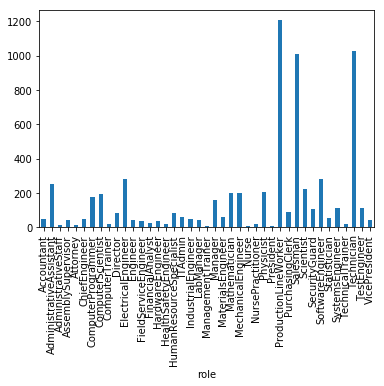

In [19]:
g2 = employees.groupby('role')
total_roles = len(g2.user_id.count()) # = 41 roles total
g2.user_id.count().plot.bar()

Distance matrix between people using Date (month joined), Role, and Supervisor to see how related people are to one another. Isn't working - code gets stuck running so this is something we need to revisit if we want to continue down this path

In [25]:
employees = employees[['employee_name', 'user_id', 'email', 'month', 'role', 'supervisor']]
categ = employees.iloc[:,3:6]
def dist(i, j):
    distance = 0.0
    for col in categ.columns:
        distance += int((categ[col].iloc[i])!=(categ[col].iloc[j]))
    return distance 

matrix = pandas.DataFrame(index = categ.index, columns = categ.index, dtype = float)
for r in range(len(categ.index)):
    for c in range(r):
        matrix.iloc[r, c] = matrix.iloc[c,r] = dist(r,c)
matrix.fillna(0.0)

KeyboardInterrupt: 

## logon_info.csv data

## emails vs html

Check emails with high number of recipients and then check the most visited sites within the hour that the email was sent to see if there were phishing links emailed out

In [57]:
max_recipients = joined[joined.num_people == 5]
max_recipients = max_recipients[['date', 'employee_name','email', 'role', 'people', 'size', 'num_people']]
max_recipients

,date,employee_name,email,role,people,size,num_people
0,10/31/2017 19:48:19,Kadeem Troy Randolph,Kadeem.Troy.Randolph@dtaa.com,ComputerScientist,"[Hu.Duncan.Rojas@dtaa.com, Paula.Delilah.Barne...",16947,5
7,09/20/2017 15:51:21,Kadeem Troy Randolph,Kadeem.Troy.Randolph@dtaa.com,ComputerScientist,"[Yen.Echo.Velez@dtaa.com, Fiona.Phyllis.Swanso...",23390,5
14,08/06/2017 10:53:02,Kadeem Troy Randolph,Kadeem.Troy.Randolph@dtaa.com,ComputerScientist,"[Yen.Echo.Velez@dtaa.com, Palmer.Josiah.Young@...",29377,5
21,06/01/2017 17:19:51,Kadeem Troy Randolph,Kadeem.Troy.Randolph@dtaa.com,ComputerScientist,"[Edward.Vance.Woodard@dtaa.com, Palmer.Josiah....",24835,5
28,08/18/2017 14:44:24,Kadeem Troy Randolph,Kadeem.Troy.Randolph@dtaa.com,ComputerScientist,"[Palmer.Josiah.Young@dtaa.com, Yen.Echo.Velez@...",26449,5
4025,08/27/2017 11:18:58,Hiram Jasper Velez,Hiram.Jasper.Velez@dtaa.com,Salesman,"[Warren.Louis.Mayo@dtaa.com, Amir.August.Roy@d...",31248,5
4032,09/03/2017 13:24:50,Hiram Jasper Velez,Hiram.Jasper.Velez@dtaa.com,Salesman,"[Mohammad.Armando.Vega@dtaa.com, Amir.August.R...",32620,5
4039,05/04/2017 13:58:42,Hiram Jasper Velez,Hiram.Jasper.Velez@dtaa.com,Salesman,"[Kendall.Lynn.Hatfield@dtaa.com, Casey.Adena.B...",40207,5
4046,05/27/2017 12:48:24,Hiram Jasper Velez,Hiram.Jasper.Velez@dtaa.com,Salesman,"[Warren.Louis.Mayo@dtaa.com, Helen.Brooke.Buch...",40711,5
4053,08/16/2017 08:49:06,Hiram Jasper Velez,Hiram.Jasper.Velez@dtaa.com,Salesman,"[Quemby.Charity.Dudley@dtaa.com, Amir.August.R...",17125,5


# Next Steps

With the http_info data, we plan to filter out the sites that are usually common, such as Facebook, Google, Youtube, etc. to narrow down the data set allowing us to focus on more interesting data. Furthermore, we hope to tie this data to the email data to see if there were suspicious sites visited based off of irregular email activity. This could include emails that were sent to non-DTAA org people or emails that were sent to large groups of people (potential phishing?)

Once we have a stronger direction on who our suspect is, we would like to construct a distance matrix or some sort of tree to map out who is connected to who in the company to potentially find noteable relationships or partnerships that may have led to a group conspiracy.

We would also like to see who was logging in and out at odd hours (similar to how we examined the offhours devices connects activity)

We plan to do more research to understand better what kind of cyber security threats there are and how our data may suggest that one occured.